In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
plt.style.use('fivethirtyeight')
%matplotlib inline
import pandas as pd
from datetime import datetime
import seaborn as sns
sns.set()
import warnings; warnings.simplefilter("ignore")
import datetime as dt
import missingno as msno

import sklearn.mixture as mix

In [ ]:
data_path = "./Data"
cur_path = os.getcwd()
data_repo = os.path.join(cur_path, data_path)
all_file = []
for file in os.listdir(data_repo):
    if file[-10:-4] != 'Weekly':
        temp = pd.read_csv(os.path.join(data_repo,file))
        all_file.append(temp)
    else:
        continue

In [ ]:
def dt_format(tt):
    DATE_FORMATS = ["%y-%b", "%b-%y", "%b %y","%m/%d/%Y"]
    for df in DATE_FORMATS:
        try:
            datetime.strptime(tt,df)
            return df
        except:
            continue          

In [ ]:
for i in range(2):
    all_file[i].set_index(all_file[1]['Date'],inplace = True)
    all_file[i].drop(['Date'],axis = 1, inplace = True)

for j in range(2,len(all_file)):
    if "Date" in all_file[j].columns:
        # Some date type recorded as 9-March -> 09-March(=2009-March)
        for i in range(len(all_file[j]["Date"])):
            if len(all_file[j]["Date"][i]) != 6:
                all_file[j]["Date"][i] = "0" + all_file[j]["Date"][i]
        
        try:
            _ = pd.to_datetime(all_file[j]['Date'],format = dt_format(all_file[j]["Date"][0]),errors="coerce")\
                .fillna(pd.to_datetime(all_file[j]["Date"],format="%b-%y",errors="coerce"))
            all_file[j].set_index(_,inplace=True)
            all_file[j].drop(['Date'],axis=1,inplace = True)
            all_file[j].sort_index(inplace=True)
        except:
            continue
    
    elif "DATE" in all_file[j].columns:
        try:
            all_file[j].set_index(pd.to_datetime(all_file[j]['DATE'],format = dt_format(all_file[j]["DATE"][0])),inplace = True)
            all_file[j].drop(['DATE'],axis=1,inplace = True)
            all_file[j].sort_index(inplace=True)
        except:
            continue

In [ ]:
for j in range(2,len(all_file)):
    if "Price" in all_file[j].columns:
        all_file[j]["Log_Price"] = np.log(all_file[j]["Price"])
        all_file[j]["Log_Return"] = all_file[j]["Log_Price"] - all_file[j]["Log_Price"].shift(1)
    
    elif "CLOSE" in all_file[j].columns:
        all_file[j]["Log_Price"] = np.log(all_file[j]["CLOSE"])
        all_file[j]["Log_Return"] = all_file[j]["Log_Price"] - all_file[j]["Log_Price"].shift(1)

In [ ]:
fig, axes= plt.subplots(2,2,figsize=(10,5))
fig.suptitle("S&P500")
sns.lineplot(data = all_file[2]["Log_Price"],ax=axes[0,0]).set(title="Log Price")
sns.lineplot(data=all_file[2]["Log_Return"],ax=axes[0,1]).set(title="Log Return")

sns.distplot(all_file[2]["Log_Price"],ax=axes[1,0])
sns.distplot(all_file[2]["Log_Return"],ax=axes[1,1])

fig.tight_layout()
plt.savefig("S&P500_expplot")

In [ ]:
fig, axes= plt.subplots(2,2,figsize=(10,5))
fig.suptitle("VIX")
sns.lineplot(data = all_file[7]["Log_Price"],ax=axes[0,0]).set(title="Log Price")
sns.lineplot(data=all_file[7]["Log_Return"],ax=axes[0,1]).set(title="Log Return")

sns.distplot(all_file[7]["Log_Price"],ax=axes[1,0])
sns.distplot(all_file[7]["Log_Return"],ax=axes[1,1])

fig.tight_layout()
plt.savefig("VIX_expplot")

## Master Table

In [ ]:
master_table = pd.read_csv(r"C:\Users\admin\OneDrive - nyu.edu\Spring 2022\Capstone\Master Table\Master_weekly.csv")
master_table.set_index(pd.to_datetime(master_table["Date"]),inplace=True)
master_table.drop('Date',axis=1,inplace=True)

master_table["log_SP500"] = np.log(master_table["SP500"])
master_table["log_return_SP500"] = master_table["log_SP500"] - master_table["log_SP500"].shift(1)

master_table["log_VIX"] = np.log(master_table["VIX"])
master_table["log_return_VIX"] = master_table["log_VIX"] - master_table["log_VIX"].shift(1)

master_table["log_commodity"] = np.log(master_table["commodity"])
master_table["log_return_commodity"] = master_table["log_commodity"] - master_table["log_commodity"].shift(1)

master_table["yield_diff"] = master_table["bond10"] - master_table["bond3"]

In [ ]:
#master_table.to_csv(r"C:\Users\admin\OneDrive - nyu.edu\Spring 2022\Capstone\Master Table\new_master_weekly.csv")

# HMM

In [2]:
def readmaster(repo, filename):
    cur_repo = os.getcwd()
    file_repo = os.path.join(cur_repo,repo)
    df = pd.read_csv(os.path.join(file_repo,filename))
#     print(type(df))
    try:
        df["Date"] = pd.to_datetime(df["Date"],format = "%m/%d/%Y")
        df.index = df["Date"]
        df.drop(["Date"],axis=1,inplace=True)
    except:
        df["Date"] = pd.to_datetime(df["Date"],format = "%Y-%m-%d")
        df.index = df["Date"]
        df.drop(["Date"],axis=1,inplace=True)
    return df

In [3]:
master_monthly = readmaster("Master Table","New_Master_Monthly.csv")
master_weekly = readmaster("Master Table", "New_Master_Weekly.csv")

<AxesSubplot:>

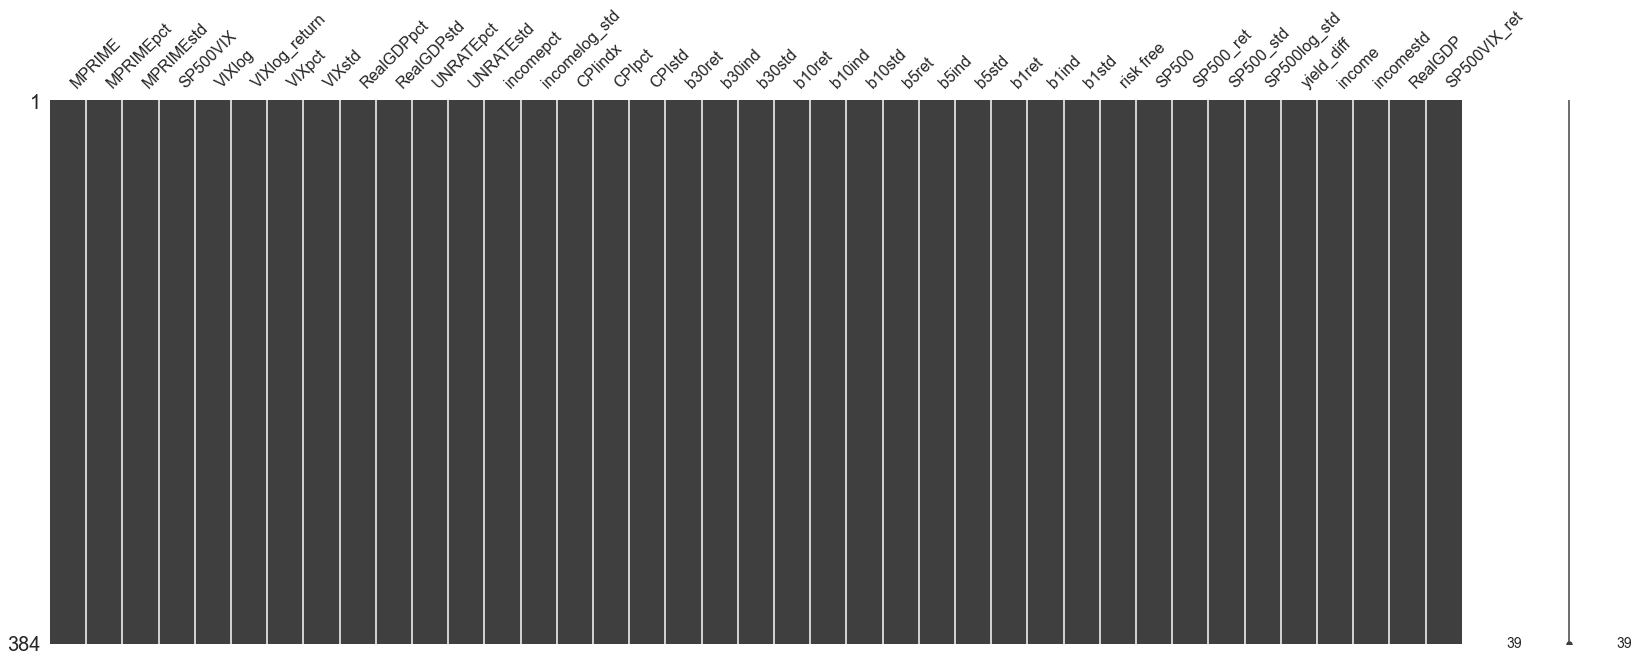

In [131]:
msno.matrix(master_monthly)
# msno.matrix(master_weekly)

In [132]:
master_monthly.columns

Index(['MPRIME', 'MPRIMEpct', 'MPRIMEstd', 'SP500VIX', 'VIXlog',
       'VIXlog_return', 'VIXpct', 'VIXstd', 'RealGDPpct', 'RealGDPstd',
       'UNRATEpct', 'UNRATEstd', 'incomepct', 'incomelog_std', 'CPIindx',
       'CPIpct', 'CPIstd', 'b30ret', 'b30ind', 'b30std', 'b10ret', 'b10ind',
       'b10std', 'b5ret', 'b5ind', 'b5std', 'b1ret', 'b1ind', 'b1std',
       'risk free', 'SP500', 'SP500_ret', 'SP500_std', 'SP500log_std',
       'yield_diff', 'income', 'incomestd', 'RealGDP', 'SP500VIX_ret'],
      dtype='object')

#### Missing Data: 
VIX starts from 1990; ReadGDP starts from 1988; Bond5 starts from 1987; Bond3 starts from 1990; 

In [4]:
# master_monthly.dropna(inplace=True)
month_feature = ['VIXpct', 'VIXstd','RealGDPpct','RealGDPstd'
                 ,'UNRATEpct','UNRATEstd','incomepct','incomestd','CPIpct','CPIstd'
                 ,'b30ret', 'b30std', 'b10ret','b10std', 'b5ret','b5std', 'b1ret','b1std'
                 ,'risk free','SP500_ret','SP500_std','yield_diff']
X = master_monthly[month_feature].values

In [11]:
from hmmlearn import hmm

In [14]:
model_hmm = hmm.GaussianHMM(n_components=3,covariance_type="full", n_iter=500).fit(X)

In [17]:
hidden = model_hmm.predict(X)

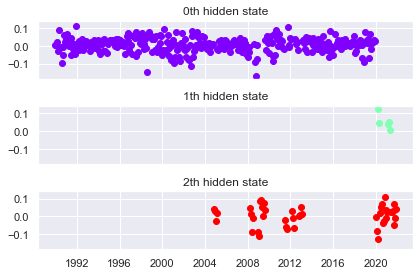

In [18]:
fig,axs = plt.subplots(model_hmm.n_components, sharex=True, sharey=True)
colors = cm.rainbow(np.linspace(0,1,model_hmm.n_components))

for i, (ax,color) in enumerate(zip(axs,colors)):
    mask = hidden == i 
    ax.plot(master_monthly.index.values[mask],
                 master_monthly["SP500_ret"].values[mask],
                "o", c = color)
    ax.set_title("{}th hidden state".format(i))
    
plt.tight_layout()
    

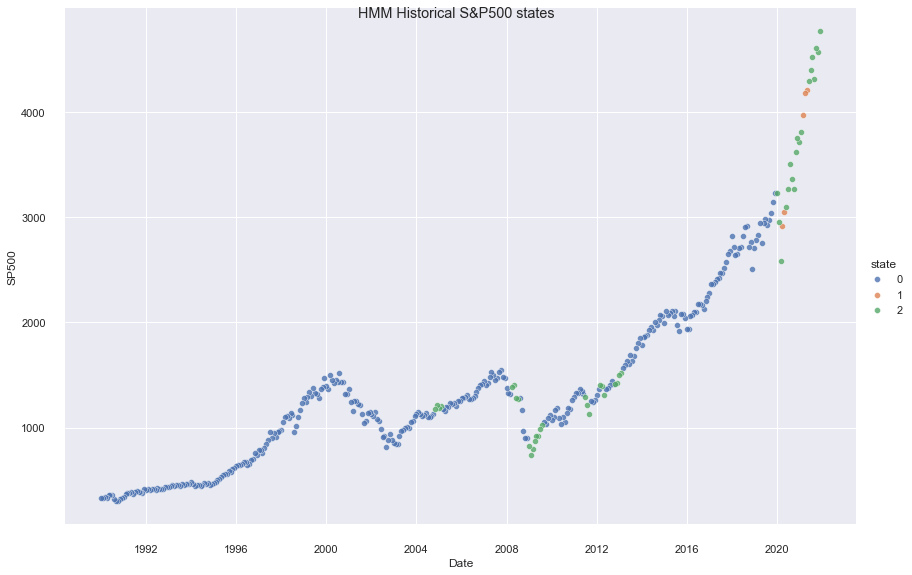

In [19]:
HMM_final_ = (pd.DataFrame(hidden, columns = ["state"],index = master_monthly.index)\
         .join(master_monthly,how = "inner")
         .assign(mkt_cumsum = master_monthly.SP500.cumsum())
         .reset_index(drop = False)
        )
# final.head()
# final.to_csv("Monthly_State.csv")

fg = sns.FacetGrid(data = HMM_final_,hue = "state",height = 8,aspect=1.5)
fg.map(sns.scatterplot, "Date", "SP500",alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle("HMM Historical S&P500 states")
plt.savefig("SP500_state")

In [134]:
model = mix.GaussianMixture(n_components=3,
                            covariance_type="full",
                            n_init=100,
                            random_state=7).fit(X)

In [135]:
hidden_state = model.predict(X)

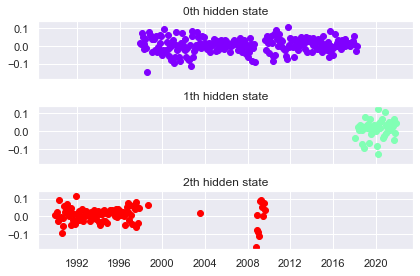

In [137]:
fig,axs = plt.subplots(model.n_components, sharex=True, sharey=True)
colors = cm.rainbow(np.linspace(0,1,model.n_components))

for i, (ax,color) in enumerate(zip(axs,colors)):
    mask = hidden_state == i 
    ax.plot(master_monthly.index.values[mask],
                 master_monthly["SP500_ret"].values[mask],
                "o", c = color)
    ax.set_title("{}th hidden state".format(i))
    
plt.tight_layout()
    

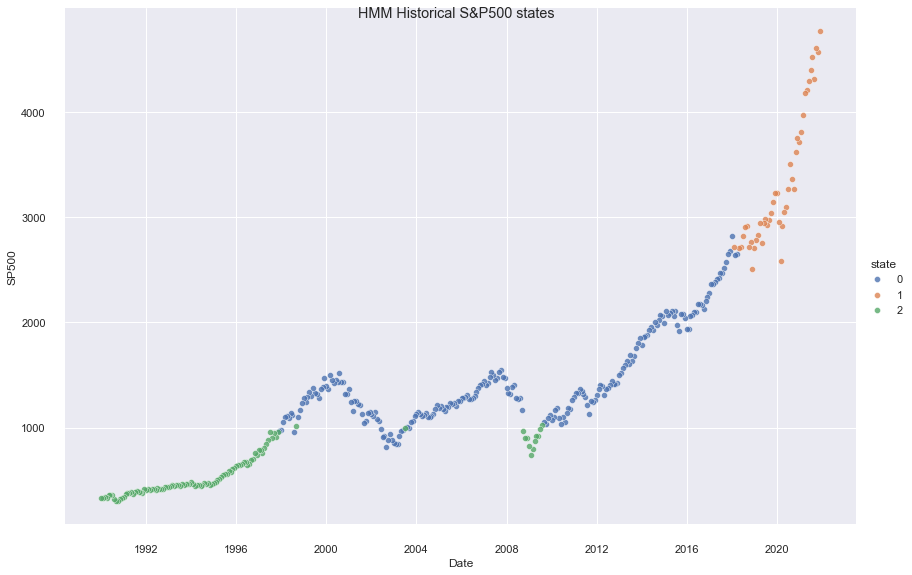

In [138]:
HMM_final = (pd.DataFrame(hidden_state, columns = ["state"],index = master_monthly.index)\
         .join(master_monthly,how = "inner")
         .assign(mkt_cumsum = master_monthly.SP500.cumsum())
         .reset_index(drop = False)
        )
# final.head()
# final.to_csv("Monthly_State.csv")

fg = sns.FacetGrid(data = HMM_final,hue = "state",height = 8,aspect=1.5)
fg.map(sns.scatterplot, "Date", "SP500",alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle("HMM Historical S&P500 states")
plt.savefig("SP500_state")

In [139]:
state_idc=['MPRIME','SP500VIX','RealGDPpct',
       'UNRATEpct', 'incomepct','CPIindx',
       'b30ret','b10ret','b5ret','b1ret', 'risk free','RealGDP','SP500_ret']
HMM_final.groupby("state").mean()[state_idc]

,MPRIME,SP500VIX,RealGDPpct,UNRATEpct,incomepct,CPIindx,b30ret,b10ret,b5ret,b1ret,risk free,RealGDP,SP500_ret
state,,,,,,,,,,,,,
0,5.243203,19.266061,0.002024,5.795671,-0.001485,486.613853,0.005966,0.004204,0.003744,0.002092,0.584189,15.243290,0.005616
1,4.220889,20.501556,0.001788,5.337778,0.000026,611.277778,0.007134,0.003917,0.003082,0.001374,0.097847,18.891556,0.013501
2,7.435278,19.542222,0.002006,6.346296,-0.001058,361.014815,0.006993,0.007113,0.006301,0.004829,2.330933,10.789106,0.010429


In [140]:
HMM_final.groupby("state").std()[state_idc]

,MPRIME,SP500VIX,RealGDPpct,UNRATEpct,incomepct,CPIindx,b30ret,b10ret,b5ret,b1ret,risk free,RealGDP,SP500_ret
state,,,,,,,,,,,,,
0,2.130671,6.293067,0.005393,1.691970,0.007699,63.486882,0.033854,0.017888,0.011563,0.002697,0.792462,1.760208,0.039543
1,0.966994,8.299040,0.021820,2.592760,0.050253,18.591003,0.043552,0.017115,0.008950,0.001917,0.226171,0.607528,0.050330
2,1.882514,9.813928,0.005331,1.127931,0.007064,53.277750,0.040160,0.022593,0.013325,0.003067,2.117264,1.702726,0.043026


# Kmean Cluster and ML algo

In [16]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

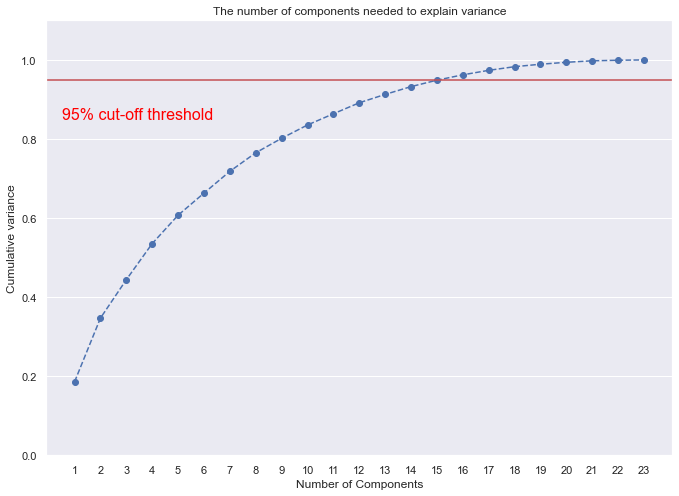

In [94]:
scaled_master_monthly = StandardScaler().fit_transform(master_monthly[month_feature])
pca = PCA(svd_solver="randomized").fit(scaled_master_monthly)

fig, ax = plt.subplots(figsize=(10,8))
xi = np.arange(1, scaled_master_monthly.shape[1]+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1,len(xi)+1, step=1)) 
plt.ylabel('Cumulative variance')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
# plt.axvline(x=16, color='g', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

# print("PCA explained variance ratio:" , pca.explained_variance_ratio_)
# print("PCA singular values:" , pca.singular_values_)
ax.grid(axis='x')
# plt.show()
# plt.savefig("PCA.png")

In [68]:
_ = pd.DataFrame(data = y*100,index = np.arange(1,len(xi)+1,1),columns = ["PCA(%)"])
pc = min(_.loc[_.values>95].index)

In [ ]:
_

In [69]:
pca_master_monthly = PCA(svd_solver="randomized",n_components=pc).fit_transform(scaled_master_monthly)
pca_master_monthly = pd.DataFrame(pca_master_monthly,index = master_monthly.index)
pca_master_monthly.sort_index(ascending=True,inplace=True)

In [70]:
model = KMeans(n_clusters=3)
model.fit(pca_master_monthly)
predicted_state = model.predict(pca_master_monthly)
regimes = np.unique(predicted_state)

predicted_state = pd.DataFrame(predicted_state, columns = ["state"],index = master_monthly.index)

Text(0.5, 0.98, 'Cluster Historical S&P500 states')

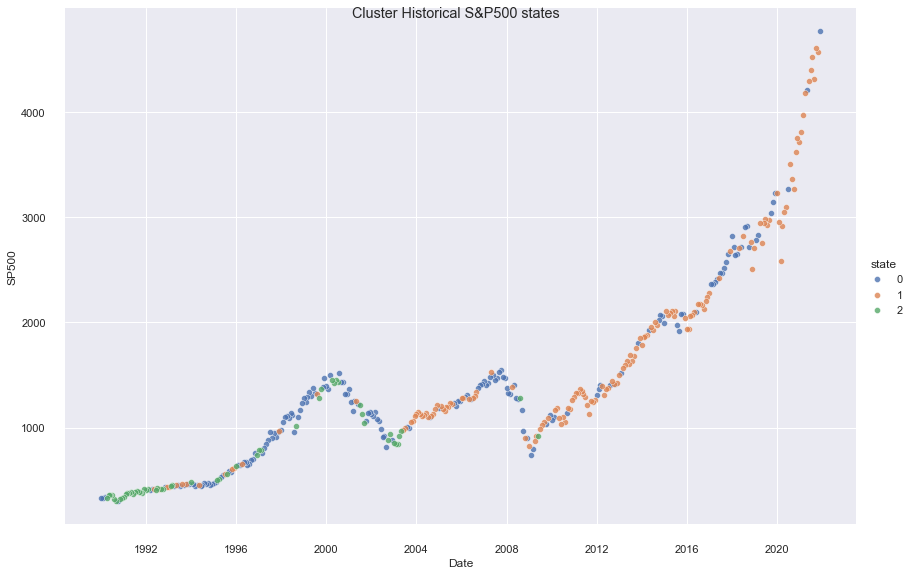

In [71]:
ML_final = (predicted_state
         .join(pca_master_monthly,how = "inner")
         .assign(SP500 = master_monthly.SP500)
         .reset_index(drop = False)
        )
# ML_final.head()

fg = sns.FacetGrid(data = ML_final,hue = "state",height = 8,aspect=1.5)
fg.map(sns.scatterplot, "Date", "SP500",alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle("Cluster Historical S&P500 states")
# plt.savefig("cluster_SP500_state")

In [72]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

models = {"LinearDiscriminantAnalysis": LinearDiscriminantAnalysis,
         "LogisticRegression": LogisticRegression, 
         "RandomForestClassifier": RandomForestClassifier, 
         "AdaBoostClassifier": AdaBoostClassifier,
         "DecisionTree":DecisionTreeClassifier,
         "GradientBoostingClassifier":GradientBoostingClassifier}

In [73]:
train_len = int(pca_master_monthly.shape[0]*0.8)
test_len = pca_master_monthly.shape[0] - train_len
X_train, y_train = pca_master_monthly.iloc[:train_len+1,:], predicted_state.iloc[:train_len+1,:] 
X_test, y_test = pca_master_monthly.iloc[train_len+1:, :], predicted_state.iloc[train_len+1:, :] 

In [74]:
# scores = {}
fitted_model={}
for name,method in models.items():
    _model = method()
    _model.fit(X_train,y_train)
    fitted_model[name] = _model
    print("{} cross validation score is: {:.3f}".format(name, cross_val_score(_model, X_train, y_train, cv=10).mean()))

LinearDiscriminantAnalysis cross validation score is: 0.848
LogisticRegression cross validation score is: 0.961
RandomForestClassifier cross validation score is: 0.899
AdaBoostClassifier cross validation score is: 0.847
DecisionTree cross validation score is: 0.848
GradientBoostingClassifier cross validation score is: 0.903


In [75]:
assess = {}
tests=['ROC','Accuracy']
for test in tests:
    temp_test={}
    for name, _model in fitted_model.items():
        y_hat = _model.predict(X_test)
        y_prob = _model.predict_proba(X_test)
        y_test[name+"_Predicted"] = y_hat
        if test =="ROC":
            temp_test[name] = roc_auc_score(y_test["state"], y_prob, multi_class='ovr')
        else:
            temp_test[name] = accuracy_score(y_test["state"],y_hat)
    assess[test] = temp_test

pd.DataFrame(assess)

,ROC,Accuracy
LinearDiscriminantAnalysis,0.981817,0.894737
LogisticRegression,0.990081,0.907895
RandomForestClassifier,0.957429,0.710526
AdaBoostClassifier,0.888220,0.631579
DecisionTree,0.688782,0.539474
GradientBoostingClassifier,0.938759,0.736842


# Quarterly Rolling mean Classification

In [26]:
def label_regime(row):
    if row["Quarter_mean"] > 3:
        return 2
    elif row["Quarter_mean"] < -3:
        return 0
    else:
        return 1

In [173]:
avg = readmaster("Master Table","Regime_Monthly.csv")
avg.replace('#DIV/0!', np.nan,inplace=True)
avg.rename(columns={"avg_ret":"Mkt_avg"},inplace=True)
pd.to_numeric(avg["Mkt_avg"])
# avg.drop("regime",axis=1,inplace=True)
avg["Quarter_mean"] = avg["Mkt_avg"].rolling(4).mean()
avg.fillna(method="bfill",inplace=True)
avg.fillna(method="ffill",inplace=True)

avg["regime"] = avg.apply(lambda x: label_regime(x),axis = 1)
# avg.head()

In [174]:
def smooth_regime(df):
    x = df.shift(1) == df
    y = x.shift(1) != x
    y = y[1:]
    y.reset_index(inplace=True)
    x = x[:-1]
    boolean = x["regime"] | y["regime"]
    df["bol"] = boolean
    
    df.loc[df.loc[df.bol == False].index,"regime"] = np.nan
    df.fillna(method = "ffill", inplace = True)
    return

In [175]:
smooth_regime(avg)

In [176]:
# only run at first time
complete_data = readmaster("Master Table","New_Master_Monthly.csv")

Text(0.5, 0.98, 'Rolling Avg Historical S&P500 states')

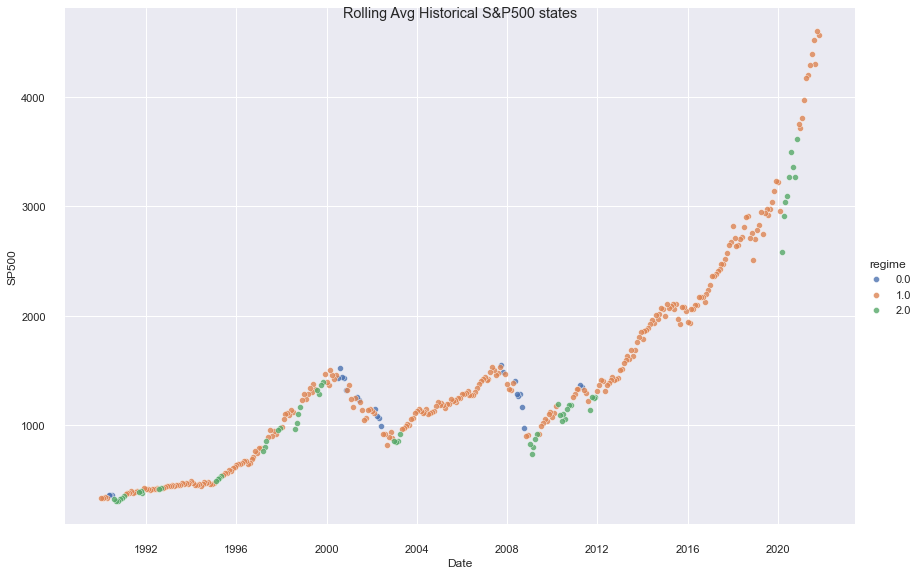

In [294]:
rolling_final = avg.join(complete_data.SP500).reset_index()
# ML_final.head()

fg = sns.FacetGrid(data = rolling_final,hue = "regime",height = 8,aspect=1.5)
fg.map(sns.scatterplot, "Date", "SP500",alpha=0.8).add_legend()
sns.despine(offset=10)
fg.fig.suptitle("Rolling Avg Historical S&P500 states")
# plt.savefig("rolling_SP500_state")

# Backtest

In [206]:
master_monthly.sort_index(ascending=True,inplace=True)

# HMM_final.set_index(HMM_final["Date"],inplace=True)
# HMM_final.drop(["Date"],axis=1,inplace=True)
HMM_final.sort_index(ascending=True, inplace=True)

# ML_final.sort_index(ascending=True, inplace=True)
# ML_final.drop(["Date"],axis=1,inplace=True)
# ML_final.sort_index(ascending=True, inplace=True)

# rolling_final.set_index(rolling_final["Date"],inplace=True)
# rolling_final.sort_index(ascending=True, inplace=True)
# rolling_final.drop("Date",axis=1,inplace=True)


In [283]:
backtest = pd.DataFrame()
backtest["market"]=master_monthly['SP500_ret'].cumsum()

backtest["HMM"]=None
backtest["HMM"].iloc[0] = 0
for i in range(1,HMM_final.shape[0]):
    if HMM_final["state"].iloc[i] == 2:
        # short market
        backtest["HMM"].iloc[i] = backtest["HMM"].iloc[i-1] - HMM_final["SP500_ret"].iloc[i]
        
    elif HMM_final["state"].iloc[i] == 1:
        # long vix
        backtest["HMM"].iloc[i] = backtest["HMM"].iloc[i-1] + HMM_final["SP500VIX_ret"].iloc[i]
        
    else: # HMM_final["state"].iloc[i] == 0:
        # long market
        backtest["HMM"].iloc[i] = backtest["HMM"].iloc[i-1] + HMM_final["SP500_ret"].iloc[i]

In [311]:
rolling_final["SP500_ret"] = rolling_final["SP500"].pct_change()

In [317]:
rolling_final.groupby("regime").mean()

# short market on regime 0
# keep same on regime 2
# long on regime 1

,Quarter_mean,bol,SP500,SP500_ret
regime,,,,
0.0,-4.647832,0.62500,1169.636250,-0.020409
1.0,0.852597,0.82392,1476.866412,0.009403
2.0,3.676526,0.62069,1207.053103,0.011172


In [318]:
backtest["rolling"]=None
backtest["rolling"].iloc[0] = 0
for i in range(1,HMM_final.shape[0]):
    if rolling_final["regime"].iloc[i] == 0:
        # short market
        backtest["rolling"].iloc[i] = backtest["rolling"].iloc[i-1] - rolling_final["SP500_ret"].iloc[i]
        
    elif rolling_final["regime"].iloc[i] == 2:
        # same
        backtest["rolling"].iloc[i] = backtest["rolling"].iloc[i-1]
        
    else: # HMM_final["state"].iloc[i] == 1:
        # long market
        backtest["rolling"].iloc[i] = backtest["rolling"].iloc[i-1] + rolling_final["SP500_ret"].iloc[i]

<AxesSubplot:xlabel='Date'>

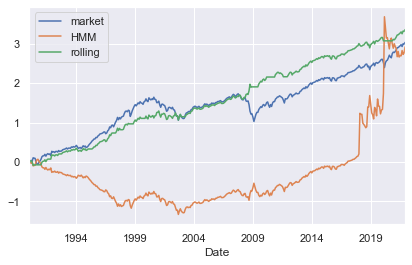

In [319]:
backtest.plot()